# Homework for Lesson 1 

This code needs re-running every time.

In [1]:
%matplotlib inline
path = "/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/"
import utils;
# from imp import reload  # fixes a P2-P3 incompatibility
# reload(utils)
from utils import *

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1070 (CNMeM is disabled, cuDNN 5110)
Using Theano backend.


TO DO:
1. create validation set and sample
2. move to separate dirs for each set
3. finetune and train
4. submit

## Create validation set and sample 

N.B. <strong>Don't rerun the below!</strong> Or you'll create lots of new dirs!

In [59]:
%pwd

'/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/train'

In [13]:
%cd /home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux

/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux


In [66]:
!tree -d

.
├── test
└── train

2 directories


In [67]:
%cd train

/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/train


In [68]:
%mkdir ../valid

In [69]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], '../valid/' + shuf[i])

In [70]:
%mkdir ../sample
%mkdir ../sample/train
%mkdir ../sample/valid

In [72]:
!tree -d ../

../
├── sample
│   ├── train
│   └── valid
├── test
├── train
└── valid

6 directories


In [75]:
from shutil import copyfile

In [ ]:
%pwd

In [74]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], '../sample/train/' + shuf[i])

In [77]:
%cd ../valid

/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/valid


In [78]:
%pwd

'/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/valid'

In [79]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], '../sample/valid/' + shuf[i])

In [1]:
# %ls

## Move to separate dirs for each set

Move all cats to a cats directory and all dogs to a dogs dir

... for each set?? Is this why he separates the 'cd' commands out, below?

YES!

In [84]:
%cd ../train

/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/train


In [86]:
%cd ../valid

/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/valid


In [88]:
%cd ../sample/train

/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/sample/train


In [90]:
%cd ../valid

/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/sample/valid


In [32]:
%pwd

'/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/sample/valid'

In [93]:
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

mkdir: cannot create directory ‘cats’: File exists
mkdir: cannot create directory ‘dogs’: File exists
mv: cannot stat 'cat.*.jpg': No such file or directory
mv: cannot stat 'dog.*.jpg': No such file or directory


In [12]:
%cd data/redux

[Errno 2] No such file or directory: 'data/redux'
/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/test


In [10]:
# Create single 'unknown' class for test set
#%cd test
%mkdir unknown
%mv *.jpg unknown/

In [14]:
!tree -d

.
├── results
├── sample
│   ├── train
│   │   ├── cats
│   │   └── dogs
│   └── valid
│       ├── cats
│       └── dogs
├── test
│   └── unknown
├── train
│   ├── cats
│   └── dogs
└── valid
    ├── cats
    └── dogs

16 directories


## Finetune and train

This code can just be copied from the standard Lesson-1 material

In [2]:
print(path)

/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/


## This code (2 blocks) needs re-running

In [3]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

In [5]:
# Import our class, and instantiate
import vgg16; 
from vgg16 import Vgg16
vgg = Vgg16()

In [6]:
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
print(path+'train')
batches = vgg.get_batches(path+'train', batch_size = batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size = batch_size*2)
vgg.finetune(batches)

/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/train
Found 21000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Run a few epochs of fitting, saving the weights each time

In [40]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
21000/21000 [==============================] - 232s - loss: 0.1393 - acc: 0.9636 - val_loss: 0.0652 - val_acc: 0.9835


In [41]:
vgg.model.save_weights(path + 'results/ft1.h5')

In [43]:
vgg.model.load_weights(path + 'results/ft1.h5')

In [44]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
21000/21000 [==============================] - 219s - loss: 0.1011 - acc: 0.9758 - val_loss: 0.0541 - val_acc: 0.9870


In [45]:
vgg.model.save_weights(path + 'results/ft2.h5')

After 2 epochs, let's reduce the LR... (annealing):

In [46]:
vgg.model.optimizer.lr = 0.01

In [47]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
21000/21000 [==============================] - 219s - loss: 0.0942 - acc: 0.9784 - val_loss: 0.0687 - val_acc: 0.9850


In [48]:
vgg.model.save_weights(path + 'results/ft3.h5')

In [116]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
21000/21000 [==============================] - 218s - loss: 0.1161 - acc: 0.9692 - val_loss: 0.0584 - val_acc: 0.9825


In [122]:
vgg.model.save_weights(path + 'results/ft4.h5')

## Submit

Kaggle shares what they expect, by sharing a <strong>sample</strong>

In [15]:
%ls

results/  sample_submission.csv  test.zip  train.zip
sample/   test/                  train/    valid/


In [16]:
!head sample_submission.csv

id,label
1,0.5
2,0.5
3,0.5
4,0.5
5,0.5
6,0.5
7,0.5
8,0.5
9,0.5


So the format is (id, label), where the id is the file number, and the label is a probability 0<<p<<1

And, of course, the <em>test</em>

In [17]:
%ls test

unknown/


In [14]:
%ls test -d

test/


### Making the predictions

In [18]:
print(path + 'test')
print(len(os.listdir(path + 'test')))

/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/test
1


Let's make some real predictions, then...

In [49]:
batches, preds = vgg.test(path + 'test', batch_size = batch_size * 2)

Found 12500 images belonging to 1 classes.


N.B. We need the batches to get the filenames, as we can parse the filenames to get the IDs

In [50]:
filenames = batches.filenames

N.B. Kaggle is expecting something of the form 'isDog', which corresponds to the second column in the following:

In [51]:
preds[:5]

array([[  1.7251e-12,   1.0000e+00],
       [  1.1085e-11,   1.0000e+00],
       [  9.9999e-01,   6.1808e-06],
       [  1.7331e-08,   1.0000e+00],
       [  1.7599e-10,   1.0000e+00]], dtype=float32)

In [52]:
filenames[:5]

['unknown/429.jpg',
 'unknown/7807.jpg',
 'unknown/7292.jpg',
 'unknown/5620.jpg',
 'unknown/8651.jpg']

In [53]:
save_array(path + 'results/test_preds.dat', preds)
save_array(path + 'results/filenames.dat', filenames)

In [54]:
preds = load_array('results/test_preds.dat')
filenames = load_array('results/filenames.dat')

In [55]:
from PIL import Image

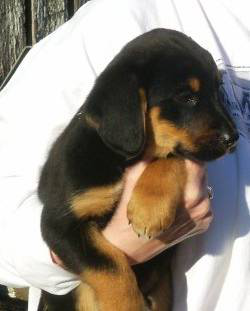

In [56]:
Image.open('test/'+filenames[0])

In [57]:
isdog = np.clip(preds[:,1], 0.02, 0.98)     # create an isdog index from col #1 ('dog' col) of preds 
                                            # and 'clip' it, to downgrade its confident predictions (penalised by log loss)

In [58]:
isdog[:5]

array([ 0.98,  0.98,  0.02,  0.98,  0.98], dtype=float32)

If each filename comes back with a partial path, such as 'unknown/4392.jpg', create an ID list from this that takes a 'middle' from the 9th position in the string onwards until the '.'(e.g. '4392'), using a list comprehension.

In [59]:
ids = [int(f[8:f.find('.')]) for f in filenames]
ids [:5]

[429, 7807, 7292, 5620, 8651]

Use Numpy's 'stack' to put these two columns together into an array of predictions.

In [60]:
subm = np.stack([ids, isdog], axis = 1)
subm[:5]

array([[  4.2900e+02,   9.8000e-01],
       [  7.8070e+03,   9.8000e-01],
       [  7.2920e+03,   2.0000e-02],
       [  5.6200e+03,   9.8000e-01],
       [  8.6510e+03,   9.8000e-01]])

This is our array of answers to the test data. 

In [61]:
%pwd

'/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux'

In [62]:
np.savetxt(path + 'subm98.csv', subm, fmt = '%d,%.5f', header = 'id,label', comments = '')

All we need to do now is present this for uploading. Here's a nice trick for making this easy.

In [63]:
from IPython.display import FileLink
FileLink(path + 'subm98.csv')

/home/mark/Study/dl.fast.ai/deeplearning1/nbs/data/redux/subm98.csv

# Investigating model error

N.B. this code is highly reusable!

We need to do 5 things. We should look at examples of:
1. correct labels, at random
2. incorrect labels, at random
3. the labels, in each class, with highest probability of being correct
4. the labels, in each class, with highest probability of being incorrect
5. the 'most-uncertain' labels (p=0.5)

### First, load a weights-set, and make some new predictions ('probs')

Note that this uses the 'test' method in vgg...

In [7]:
vgg.model.load_weights(path+'results/ft1.h5')
val_batches, probs = vgg.test(path+'valid', batch_size = batch_size)

Found 2000 images belonging to 2 classes.


In [8]:
labels = val_batches.classes
filenames = val_batches.filenames

N.B. the 'probs' here are probabilities.

In [9]:
probs = probs[:,0]
preds = np.round(1-probs)
probs[:8]

array([ 1.    ,  0.5743,  1.    ,  0.3327,  1.    ,  1.    ,  1.    ,  1.    ], dtype=float32)

In [10]:
preds[:8]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.], dtype=float32)

In [21]:
# Number of images to view for each visualisation task
n_view = 4

Helper function to plot images by index in the validation set:

In [22]:
def plots_idx(idx, titles = None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], titles = titles)

### 1. A few correct labels at random

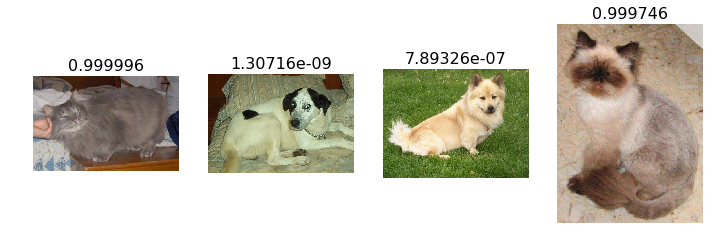

In [23]:
#1. A few correct labels at random 
correct = np.where(preds == labels)[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

### 2. A few incorrect labels at random:

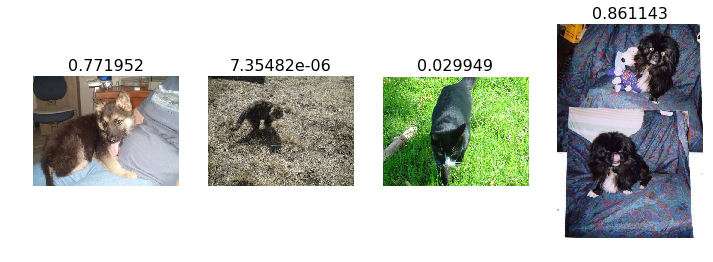

In [24]:
incorrect = np.where(preds != labels)[0]
idx = permutation(incorrect)[:n_view]
plots_idx(idx, probs[idx])

### 3. The labels, in each class, with highest probability of being correct

[] I should try to understand how 'correct_cats[most_correct_cats]' works!

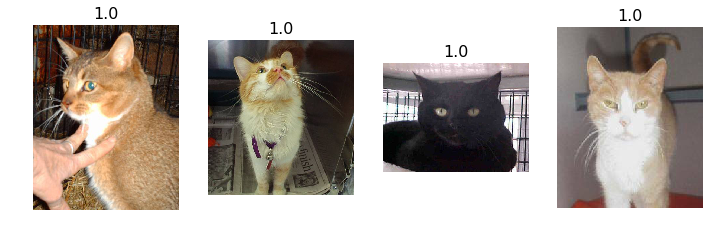

In [25]:
correct_cats = np.where((preds == 0) & (preds == labels))[0]
most_correct_cats = np.argsort(probs[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], probs[correct_cats][most_correct_cats]) 

In [31]:
print(correct_cats[:5])
print(correct_cats.shape)
print(most_correct_cats[:5])
print(most_correct_cats.shape)

[0 1 2 4 5]
(991,)
[990 415 429 427]
(4,)


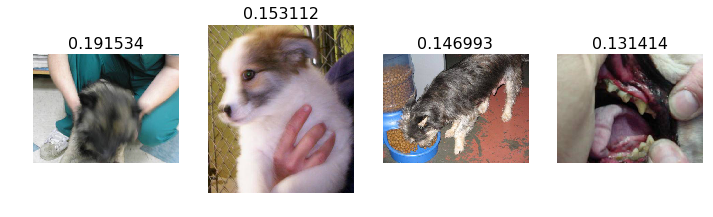

In [26]:
correct_dogs = np.where((preds == 1) & (preds == labels))[0]
most_correct_dogs = np.argsort(probs[correct_dogs])[::-1][:n_view]
plots_idx(correct_dogs[most_correct_dogs], probs[correct_dogs][most_correct_dogs]) 

### 4. The labels, in each class, with highest probability of being incorrect

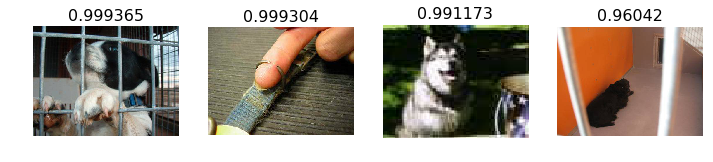

In [33]:
#4a. The images where we were most confident that they were cats, but they were dogs
incorrect_cats = np.where((preds == 0) & (preds != labels))[0]
most_incorrect_cats = np.argsort(probs[incorrect_cats])[::-1][:n_view]
plots_idx(incorrect_cats[most_incorrect_cats], probs[incorrect_cats][most_incorrect_cats]) 

Fair play ... some of these are v. hard! We could conclude that the model is doing okay if it struggles with these.

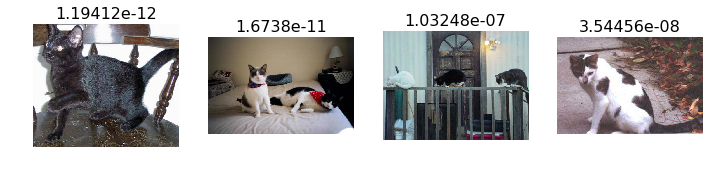

In [34]:
#4a. The images where we were most confident that they were dogs, but they were cats
incorrect_dogs = np.where((preds == 1) & (preds != labels))[0]
most_incorrect_dogs = np.argsort(probs[incorrect_dogs])[::-1][:n_view]
plots_idx(incorrect_dogs[most_incorrect_dogs], probs[correct_dogs][most_incorrect_dogs]) 

### The 'most-uncertain' labels (p=0.5)

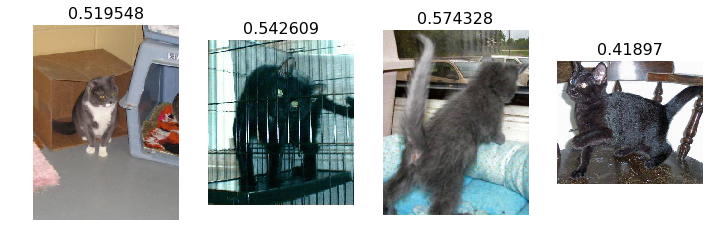

In [38]:
most_uncertain = np.argsort(np.abs(probs - 0.5))
plots_idx(most_uncertain[:n_view], probs[most_uncertain])